In [104]:
import os
import torch
import torchvision
from torch.utils.data import random_split

import numpy as np

Let's connect our google drive where dataset is uploaded.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#directory where our dataset present
!ls "/content/drive/My Drive/Colab Notebooks/Weather Classification 2"

dataset


The dataset is extracted to the directory shown below. It contains 2 folders `Training` and `Testing`, containing the training set and test set respectively. Each of them contains 5 folders, one for each class of images. Let's verify this using `os.listdir`.

In [4]:
data_dir = "/content/drive/My Drive/Colab Notebooks/Weather Classification 2/dataset"

print(os.listdir(data_dir)) #folders inside dataset directory

classes = os.listdir(data_dir + "/Training")
print(classes) #all 5 classes we want to classify by our model

['Training', 'Other', 'Testing']
['shine', 'foggy', 'cloudy', 'sunrise', 'rainy']


In [5]:
cloudy_files = os.listdir(data_dir + "/Training/cloudy")
print('No. of training examples for cloudy images:', len(cloudy_files))
print(cloudy_files[:5])

No. of training examples for cloudy images: 300
['cloudy107.jpg', 'cloudy106.jpg', 'cloudy101.jpg', 'cloudy105.jpg', 'cloudy1.jpg']


In [6]:
rainy_files = os.listdir(data_dir + "/Training/rainy")
print('No. of training examples for rainy images:', len(rainy_files))
print(rainy_files[:5])

No. of training examples for rainy images: 300
['rain195.jpg', 'rain137.jpg', 'rain100.jpg', 'rain90.jpg', 'rain83.jpg']


In [187]:
foggy_files = os.listdir(data_dir + "/Training/foggy")
print('No. of training examples for foggy images:', len(foggy_files))
print(foggy_files[:5])

No. of training examples for foggy images: 300
['foggy113.jpg', 'foggy114.jpg', 'foggy117.jpg', 'foggy116.jpg', 'foggy115.jpg']


In [188]:
sunrise_files = os.listdir(data_dir + "/Training/sunrise")
print('No. of training examples for sunrise images:', len(sunrise_files))
print(sunrise_files[:5])

No. of training examples for sunrise images: 350
['sunrise120.jpg', 'sunrise117.jpg', 'sunrise113.jpg', 'sunrise112.jpg', 'sunrise118.jpg']


In [190]:
shine_files = os.listdir(data_dir + "/Training/shine")
print('No. of training examples for shine images:', len(shine_files))
print(shine_files[:5])

No. of training examples for shine images: 250
['shine114.jpg', 'shine106.jpg', 'shine105.jpg', 'shine1.jpg', 'shine102.jpg']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

In [7]:
from torchvision.datasets import ImageFolder

In [8]:
#ALL IMAGES ARE OF DIFFERENT SIZES. OUR MODEL CANNOT ACCEPT DIFFERENT SIZE IMAGES. HAVE TO TRANSFORM ALL IMAGES TO SAME SIZE!

from torchvision import transforms
from torchvision.transforms import ToTensor

#transformations = transforms.Compose([
#    transforms.Resize(255),
#    transforms.CenterCrop(224),
#    transforms.ToTensor(),
#    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#])


train_transformations = transforms.Compose([                                                                                 
    transforms.Resize((255,255)), #let's resize to 255,255
    transforms.ToTensor()
])

test_transformations = transforms.Compose([
    transforms.Resize((255,255)), #let's resize to 255,255
    transforms.ToTensor()
])

training_dataset = ImageFolder(data_dir+'/Training', transform=train_transformations)  #apply the train transformations
testing_dataset= ImageFolder(data_dir+'/Testing', transform=test_transformations) #apply the test transformations

In [9]:
img, label = training_dataset[0] 
print(img.shape, label)
img

torch.Size([3, 255, 255]) 0


tensor([[[0.4941, 0.5098, 0.5216,  ..., 0.6196, 0.5922, 0.5686],
         [0.4980, 0.5137, 0.5255,  ..., 0.6000, 0.5686, 0.5490],
         [0.5020, 0.5137, 0.5255,  ..., 0.5725, 0.5412, 0.5255],
         ...,
         [0.0902, 0.0902, 0.0902,  ..., 0.2157, 0.2157, 0.2157],
         [0.0902, 0.0902, 0.0902,  ..., 0.2157, 0.2157, 0.2157],
         [0.0863, 0.0863, 0.0863,  ..., 0.2078, 0.2078, 0.2118]],

        [[0.4941, 0.5098, 0.5216,  ..., 0.6196, 0.5922, 0.5686],
         [0.4980, 0.5137, 0.5255,  ..., 0.6000, 0.5686, 0.5490],
         [0.5020, 0.5137, 0.5255,  ..., 0.5725, 0.5412, 0.5255],
         ...,
         [0.0902, 0.0902, 0.0902,  ..., 0.2157, 0.2157, 0.2157],
         [0.0902, 0.0902, 0.0902,  ..., 0.2157, 0.2157, 0.2157],
         [0.0863, 0.0863, 0.0863,  ..., 0.2078, 0.2078, 0.2118]],

        [[0.4941, 0.5098, 0.5216,  ..., 0.6196, 0.5922, 0.5686],
         [0.4980, 0.5137, 0.5255,  ..., 0.6000, 0.5686, 0.5490],
         [0.5020, 0.5137, 0.5255,  ..., 0.5725, 0.5412, 0.

The list of classes is stored in the `.classes` property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [10]:
#as we saw above, label was 0. So label is numeric here. Each numeric label corresponds to an element in the list of classes below.
print(training_dataset.classes)

['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(255,255,3)`. Let's create a helper function to display an image and its label.

In [12]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', training_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0)) #to change dimension from 3,255,255 to 255,255,3 as needed by matplotlib to display image 
    #not permanent change. only temporary so that image displayed by matplotlib!

Label:  cloudy (0)


torch.Size([3, 255, 255])

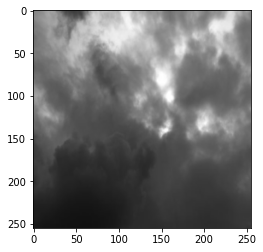

In [13]:
img, label =training_dataset[0]
show_example(img, label)
img.shape

Label:  foggy (1)


torch.Size([3, 255, 255])

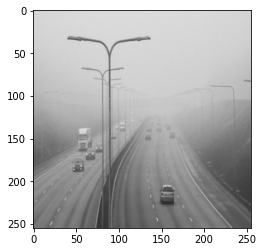

In [14]:
#can directly pass dataset
show_example(*training_dataset[300])
img.shape

Label:  rainy (2)


torch.Size([3, 255, 255])

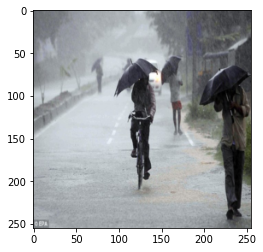

In [15]:
show_example(*training_dataset[700])
img.shape

As you can see above, by using those pytorch transformations, all images have now been converted to 3,255,255. 
Thus, we got SAME SIZE FOR ALL IMAGES!

In [16]:
random_seed = 42
torch.manual_seed(random_seed);

In [17]:
#splitting training dataset into train_ds and val_ds 
val_size = 250
train_size = len(training_dataset) - val_size

train_ds, val_ds = random_split(training_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(1250, 250)

We can now create data loaders for training and validation, to load the data in batches

In [42]:
from torch.utils.data.dataloader import DataLoader

batch_size=16 #batch size!

In [43]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

We can look at batches of images from the dataset using the `make_grid` method from `torchvision`.

In [20]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

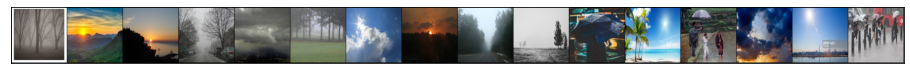

In [45]:
show_batch(train_dl) #shows the particular 16 images in the batch!

In [46]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [47]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [48]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)



Let's define the model by extending an `ImageClassificationBase` class which contains helper methods for training & validation.

In [49]:
import torch.nn as nn
import torch.nn.functional as F

In [130]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

Now, We'll use `nn.Sequential` to chain the layers and activations functions into a single network architecture.

LeNet

In [51]:
#Let's define our LeNet Network!

class LeNetCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            

            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1), #input channels 3 as our input images are RGB Images of dimension (3,255,255)
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2,stride=2),

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2,stride=2)

            #final output after all calculations is (N,16,60,60) where N is the batch size (64 as declared above)
            #REFER SCREENSHOT 20-6-2020

        )


        
        #now Dense network fully connected layer to be made now
        #so let's flatten the (N,16,60,60) INPUT images into array. (DONE BELOW IN def forward: ) 
        
        #So after flattening output is (N,16*60*60)= (N,57600) Data points! N is no of batches!
        #these data are to be sent AS INPUT TO FORWARD CONNCECTION as described below
        
        self.network2= nn.Sequential(
            
            nn.Linear(in_features=16*60*60, out_features=120), #IMP STEP! INPUT LAYER!!!!!!!! 16*60*60=57600 IS INPUT AND 120 SHOULD BE OUPUT AS 1ST HIDDEN LAYER MUST HAVE 120 NEURONS!
            nn.Tanh(),

            nn.Linear(in_features=120, out_features=84), #1ST HIDDEN LAYER WITH 120 INPUT NEURONS
            nn.Tanh(),

            nn.Linear(in_features=84, out_features=5) #2ND HIDDEN LAYER (OUTPUT LAYER) WITH 84 INPUT NEURONS AND 5 OUTPUTS (AS 5 CLASSES WE WANT TO CLASSIFY!)
        )     

      
    def forward(self, xb):
           xb= self.network(xb)
           #print('images.shape after convolution:', xb.shape)
           

           #now flatten the ouput of conv nw before passing to Forward Connection network!
           xb=torch.flatten(xb,start_dim=1) #start_dim=1 .Flatten along dimension 1. So output will be (64,57600) since N=64. If dimension=1 not specified, output will be 64*57600=3686400
           #print('images.shape after Flattening:', xb.shape)

           #passing the flattened output to feed forward nw!
           xb= self.network2(xb)
           #print('images.shape after FINAL PREDICTION from Forward Connection:', xb.shape)
           #ouput shape will be ([64,10]). Each row (each of the 64 images) has 4 ouptuts corresponding to the 4 classes!!


           #now we have to apply softmax funcion
           #m = nn.Softmax(dim=1) #start dim=1 means sum of each row probabilities must be 1. dim=0 must sum of each col probabilities must be 1.
           #output = m(xb) 
           #return output  
       
           return xb

#REFER SCREENSHOTS OF YOUTUBE VIDEO 20-6-2020 to understand all the above stuff!       

In [286]:
model = LeNetCnnModel()
model

LeNetCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (network2): Sequential(
    (0): Linear(in_features=57600, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=5, bias=True)
  )
)

In [287]:
model = to_device(LeNetCnnModel(), device)

Let's verify that the model produces the expected output on a batch of training data. The 5 outputs for each image can be interpreted as probabilities for the 5 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image. 

In [288]:
for images, labels in train_dl:
    print('INPUT IMAGES images.shape:', images.shape)

    out = model(images) #pass to model
    
    print("=========================================================")
    print('out.shape:', out.shape) # 16,4 that is 16 rows signifying 16 images and 5 columns each representing prediction for each of the 5 classes 
    #print(out)
    
    print("==========================================================")
    print('Predictions for 1st image of the batch out[0]:', out[0]) #predictions for each of the 5 classes for the first image (out[0]) 
    #It is output before softmax applied automatically by cross_entropy loss
    break

INPUT IMAGES images.shape: torch.Size([64, 3, 255, 255])
out.shape: torch.Size([64, 5])
Predictions for 1st image of the batch out[0]: tensor([-0.0055,  0.0888,  0.0198,  0.1063, -0.0889], device='cuda:0',
       grad_fn=<SelectBackward>)


## Training the Model

We can use the exact same `fit` and `evaluate` functions.

In [33]:
@torch.no_grad() #This Decorator means: do not track the gradients while this function is being executed! (because we not doing any gradient descent in evaluate fx defined below)
def evaluate(model, val_loader):
    model.eval() # additional step. There are Certain layers that need to be turned on only for training. So this fx model.eval() tells pytorch that we are currently in evaluation mode so please don't turn on those training layers right now.
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train() #additional step. To tell pytorch we are in training model. Turn on the layers required for training!

        train_losses = [] #we will also calculate training loss!

        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item() #average of all training losses calculated
        model.epoch_end(epoch, result)
        history.append(result)
    return history

#Before we begin training, let's see how it performs on the validation set with the initial set of parameters.

In [291]:
evaluate(model, val_dl)

{'val_acc': 0.17686986923217773, 'val_loss': 1.6189095973968506}

In [292]:
num_epochs = 20
opt_func = torch.optim.Adam #Adam Optimizer used now! It performs better than SGD For image dataset!
lr = 0.001

In [293]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.2678, val_loss: 0.9234, val_acc: 0.6402
Epoch [1], train_loss: 0.9493, val_loss: 0.8314, val_acc: 0.6728
Epoch [2], train_loss: 0.8286, val_loss: 0.7798, val_acc: 0.6806
Epoch [3], train_loss: 0.8042, val_loss: 0.7502, val_acc: 0.7155
Epoch [4], train_loss: 0.7617, val_loss: 0.6826, val_acc: 0.7095
Epoch [5], train_loss: 0.7099, val_loss: 0.7291, val_acc: 0.7362
Epoch [6], train_loss: 0.7012, val_loss: 0.7107, val_acc: 0.6773
Epoch [7], train_loss: 0.6397, val_loss: 0.6486, val_acc: 0.7684
Epoch [8], train_loss: 0.5891, val_loss: 0.6900, val_acc: 0.6936
Epoch [9], train_loss: 0.6302, val_loss: 0.6239, val_acc: 0.7638
Epoch [10], train_loss: 0.5797, val_loss: 0.7086, val_acc: 0.7282
Epoch [11], train_loss: 0.5723, val_loss: 0.6701, val_acc: 0.7044
Epoch [12], train_loss: 0.5672, val_loss: 0.6598, val_acc: 0.7218
Epoch [13], train_loss: 0.5060, val_loss: 0.7035, val_acc: 0.7437
Epoch [14], train_loss: 0.5124, val_loss: 0.6526, val_acc: 0.7681
Epoch [15], train_lo

In [27]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

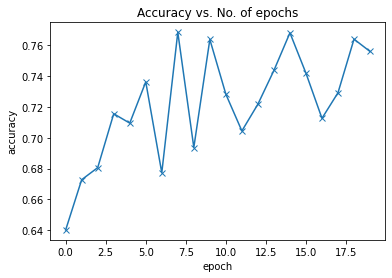

In [295]:
plot_accuracies(history)

In [28]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

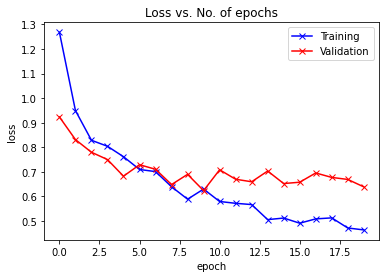

In [297]:
plot_losses(history)

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset.

In [29]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return training_dataset.classes[preds[0].item()]

Label: cloudy , Predicted: cloudy


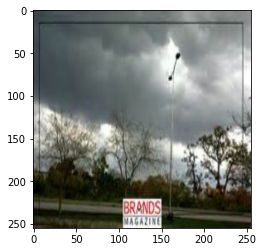

In [299]:
img, label = testing_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: rainy , Predicted: rainy


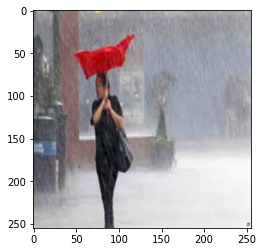

In [300]:
img, label = testing_dataset[76]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: shine , Predicted: shine


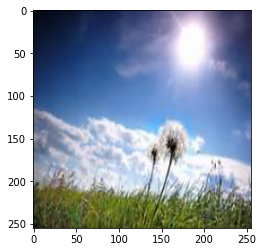

In [301]:
img, label = testing_dataset[125]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model))

As a final step, let's also look at the overall loss and accuracy of the model on the test set. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [302]:
test_loader = DeviceDataLoader(DataLoader(testing_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8536999225616455, 'val_loss': 0.4089251756668091}

## Saving and loading the model
​
Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [303]:
path = "/content/drive/My Drive/Colab Notebooks/modelweatherusinglenet.pth" 
torch.save(model.state_dict(), path) 
#MODEL WILL BE SAVED AS "modelweatherusinglenet.pth" file in your google drive!

AlexNet

In [307]:
#Let's define our AlexNet Network!

class AlexNetCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 96, kernel_size=11, stride=4),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2,ceil_mode=True), 
            #ceil_mode=True so ans will be rounded off eg. here 30.5 was rounded to 31
            #ceil_mode=False (by default) so if True not specified, 30.5 will be rounded to 30          

            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2,ceil_mode=True),
            
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2,ceil_mode=True),
        )

        #since we set ceil_mode=True, the final output is (N,256,7,7) where N is the batch size(16 here!)


        self.fc_base = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*7*7, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, 5), #no of classes=5 for our dataset

        )
         
    def forward(self, xb):
        xb= self.network(xb)
        xb = xb.view(xb.size(0), 256*7*7) #FLATTENING THE ARRAY (total 12544 data points) AND THEN GIVING TO FORWARD NETWORK!!!!
        xb = self.fc_base(xb)
        
        
        #now we have to apply softmax funcion
        #torch.nn.Softmax(xb)        
        #return xb 
        #now we have to apply softmax funcion
        #m = nn.Softmax(dim=1) #start dim=1 means sum of each row probabilities must be 1. dim=0 must sum of each col probabilities must be 1.
        #output = m(xb) 
        #return output  
       
        #NO NEED TO CALCULATE SOFTMAX HERE BECAUSE THE CROSS ENTROPY LOSS YOU HAVE CHOSEN ABOVE AUTOMATICALLY CALCULATES IT!!!
        #VERY IMP! YOU WERE DOING THIS MISTAKE BEFORE. SEE 05-CIFAR10-CNN NOTEBOOK. THERE ALSO NO SOFTMAX CALCULATED AS WE WERE USING CROSS ENTROPY LOSS!!

        return xb





        



#NOTE: YOUR INPUT IMAGE IS 255,255. 
#IF you did not set ceil_mode=True then ceil_mode will be False by default.
#so now final output after convolution will be N,256,6,6. So after flattening you'll get 256*6*6=9216 data points. Change above functions accordingly!

#REFER SCREENSHOT 21-6-2020 FOR ALL CALCULATIONS!

In [308]:
model_alexnet = AlexNetCnnModel()
model_alexnet

AlexNetCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  )
  (fc_base): S

In [309]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [310]:
model_alexnet = to_device(AlexNetCnnModel(), device)

In [311]:
evaluate(model_alexnet, val_dl)

{'val_acc': 0.19582480192184448, 'val_loss': 1.6094716787338257}

In [312]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model_alexnet(images) #pass to model
    print('out.shape:', out.shape)
    #print(out)
    print('out[0]:', out[0]) #predictions for first image (out[0])
    break

images.shape: torch.Size([64, 3, 255, 255])
out.shape: torch.Size([64, 5])
out[0]: tensor([-0.0115,  0.0139,  0.0160, -0.0144,  0.0113], device='cuda:0',
       grad_fn=<SelectBackward>)


In [313]:
num_epochs = 30
opt_func = torch.optim.Adam #Adam Optimizer used now! It performs better than SGD For image dataset!
lr = 0.001

In [314]:
history2 = fit(num_epochs, lr, model_alexnet, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.0685, val_loss: 1.2429, val_acc: 0.3713
Epoch [1], train_loss: 1.1324, val_loss: 1.1348, val_acc: 0.4848
Epoch [2], train_loss: 0.9664, val_loss: 0.8040, val_acc: 0.6242
Epoch [3], train_loss: 0.9340, val_loss: 0.9003, val_acc: 0.6488
Epoch [4], train_loss: 0.8751, val_loss: 0.8179, val_acc: 0.6767
Epoch [5], train_loss: 0.8712, val_loss: 0.7729, val_acc: 0.6573
Epoch [6], train_loss: 0.8035, val_loss: 0.8289, val_acc: 0.6085
Epoch [7], train_loss: 0.7475, val_loss: 0.7336, val_acc: 0.6892
Epoch [8], train_loss: 0.7456, val_loss: 0.6822, val_acc: 0.7522
Epoch [9], train_loss: 0.6941, val_loss: 0.6656, val_acc: 0.7401
Epoch [10], train_loss: 0.6293, val_loss: 0.6336, val_acc: 0.7534
Epoch [11], train_loss: 0.6384, val_loss: 0.6924, val_acc: 0.6972
Epoch [12], train_loss: 0.6712, val_loss: 0.7537, val_acc: 0.6765
Epoch [13], train_loss: 0.6210, val_loss: 0.5475, val_acc: 0.7926
Epoch [14], train_loss: 0.6039, val_loss: 1.4011, val_acc: 0.5836
Epoch [15], train_lo

In [315]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

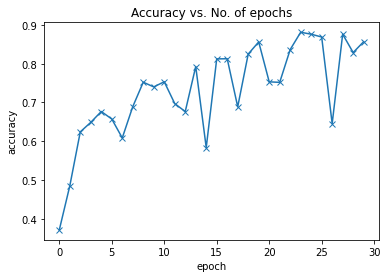

In [316]:
plot_accuracies(history2)

In [317]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

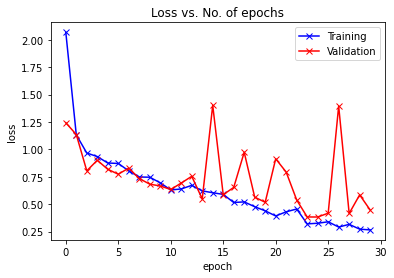

In [318]:
plot_losses(history2)

Label: cloudy , Predicted: cloudy


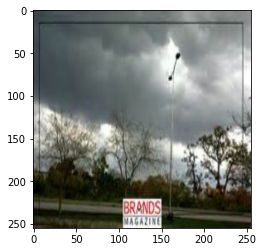

In [320]:
img, label = testing_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_alexnet))

Label: rainy , Predicted: rainy


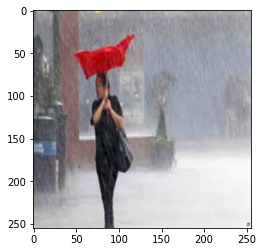

In [321]:
img, label = testing_dataset[76]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_alexnet))

Label: shine , Predicted: cloudy


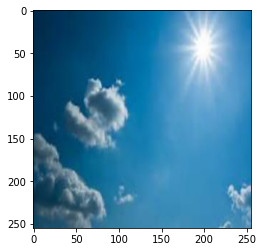

In [322]:
img, label = testing_dataset[160]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_alexnet))

Label: shine , Predicted: shine


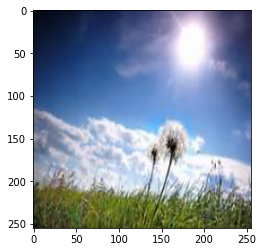

In [323]:
img, label = testing_dataset[125]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_alexnet))

Label: rainy , Predicted: rainy


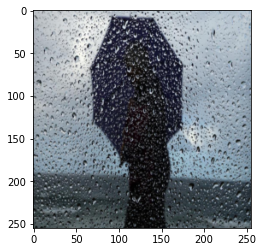

In [325]:
img, label = testing_dataset[73]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_alexnet))

In [326]:
test_loader = DeviceDataLoader(DataLoader(testing_dataset, batch_size*2), device)
result = evaluate(model_alexnet, test_loader)
result

{'val_acc': 0.9350677728652954, 'val_loss': 0.22722457349300385}

In [327]:
#torch.save(model_alexnet.state_dict(), 'weatherusingalexnet.pth')

path = "/content/drive/My Drive/Colab Notebooks/weatherusingalexnetmodel.pth" 
torch.save(model_alexnet.state_dict(), path) 
#MODEL WILL BE SAVED in your google drive!


Resnet9

In [80]:
#we are creating the resnet9 shown in diagram above. That diagram link is saved in bookmarks. open it. It is an interactive diagram, see all the layers and their composition.

def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), #batch normalisation after conv layer. We specify no of output channels as it channelwise normalisation.
              nn.ReLU(inplace=True)] #relu after batch normalisation. inplace=True means does not create new ouput vector.updates input itself.
    
    if pool: layers.append(nn.MaxPool2d(2)) #if pool=True defined while calling, add the pooling layer!
        
        
    return nn.Sequential(*layers) #puts the above layers inside pipeline and returns it


class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        #each input image is 3,255,255!
        
        #simple convolution layers
        self.conv1 = conv_block(in_channels, 64) #3 input, 64 ouput. Final output will be 64,255,255
        self.conv2 = conv_block(64, 128, pool=True) #64 input, 128 output. Final output will be 128,128,128
        
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) #residual block (2 convolutions followed by addition with output of prev step pooling)
        #Final output will be 128,128,128
            
        #simple convolution layers
        self.conv3 = conv_block(128, 256, pool=True) #we want pooling layer also! that's we wrote pool=True. so pooling layer will be added as condition applied above in code of conv_block. Final output will be 256,64,64
        self.conv4 = conv_block(256, 512, pool=True) #Final output will be 512,32,32
        
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) #residual block
        #Final output will be 512,16,16
        
        #feed forward nw
        self.classifier = nn.Sequential(nn.MaxPool2d(2), #pool. #Final output will be 512,15,15
                                        nn.Flatten(), #flatten #Final output will be single vector of size 512*15*15. 
                                        nn.Linear(512*15*15, num_classes)) #layer that takes 512*13*13 inputs gives 5 outputs!
        
    def forward(self, xb):
        out = self.conv1(xb) #simple convolution1 (3 input 64 ouput) followed by batch norm,relu. No pooling for 1st conv(see diagram) that's why didn't write pool=True
        out = self.conv2(out) #simple convolution2 (64 input 128 ouput) followed by batch norm,relu (and then pooling also )
        
        out = self.res1(out) + out #residual block: To create this, we do Addition of OUTPUT OF the 2 more CONVOLUTION BLOCKS WITH OUTPUT OF POOLING LAYER that we got in prev step (THAT SKIPPED THE CONVLUTION BLOCKS! SEE DIAGRAM!!!!) 
        
        out = self.conv3(out) #simple convolution5 (128 input 256 ouput) followed by batch norm,relu and pooling
        out = self.conv4(out) #simple convolution6 (256 input 512 ouput) followed by batch norm,relu and pooling
        
        out = self.res2(out) + out #residual block: To create this, we do Addition of OUTPUT OF the 2 more CONVOLUTION BLOCKS WITH OUTPUT OF POOLING LAYER that we got in prev step (THAT SKIPPED THE CONVLUTION BLOCKS! SEE DIAGRAM!!!!)
        
        out = self.classifier(out) #classifier (feed forward neural nw with the 9TH LAYER of the nw giving 5 outputs 1 for each class)
        return out

In [94]:
model_resnet = to_device(ResNet9(3, 5), device) #num_classes=5
model_resnet

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [54]:
history3 = [evaluate(model_resnet, val_dl)]
history3

[{'val_acc': 0.21424278616905212, 'val_loss': 1.6098284721374512}]

In [55]:
num_epochs = 30
opt_func = torch.optim.Adam #Adam Optimizer used now! It performs better than SGD For image dataset!
lr = 0.001

In [56]:
history3 = fit(num_epochs, lr, model_resnet, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 22.9017, val_loss: 5.4826, val_acc: 0.4835
Epoch [1], train_loss: 23.2974, val_loss: 14.8484, val_acc: 0.5361
Epoch [2], train_loss: 16.3085, val_loss: 9.6904, val_acc: 0.5237
Epoch [3], train_loss: 11.0337, val_loss: 9.6389, val_acc: 0.5418
Epoch [4], train_loss: 7.1412, val_loss: 5.2728, val_acc: 0.5652
Epoch [5], train_loss: 6.2227, val_loss: 5.9451, val_acc: 0.6569
Epoch [6], train_loss: 10.8328, val_loss: 6.4633, val_acc: 0.5412
Epoch [7], train_loss: 6.0355, val_loss: 3.6401, val_acc: 0.6472
Epoch [8], train_loss: 4.0667, val_loss: 2.3634, val_acc: 0.6629
Epoch [9], train_loss: 4.7266, val_loss: 2.3128, val_acc: 0.6842
Epoch [10], train_loss: 3.4416, val_loss: 6.9615, val_acc: 0.6052
Epoch [11], train_loss: 5.8081, val_loss: 3.7346, val_acc: 0.6638
Epoch [12], train_loss: 4.7994, val_loss: 1.7015, val_acc: 0.7058
Epoch [13], train_loss: 3.4305, val_loss: 1.6154, val_acc: 0.7094
Epoch [14], train_loss: 1.7242, val_loss: 1.2772, val_acc: 0.6842
Epoch [15], tr

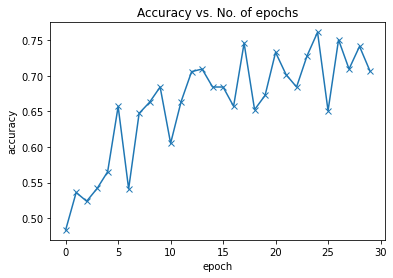

In [57]:
plot_accuracies(history3)

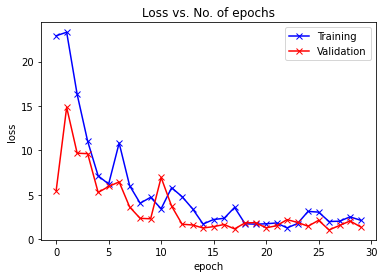

In [58]:
plot_losses(history3)


Label: cloudy , Predicted: cloudy


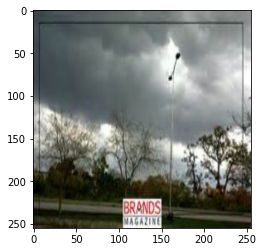

In [60]:
img, label = testing_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_resnet))

Label: rainy , Predicted: rainy


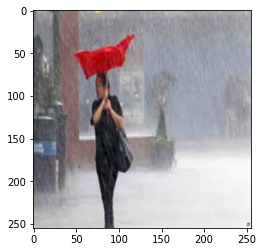

In [61]:
img, label = testing_dataset[76]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_resnet))


Label: shine , Predicted: shine


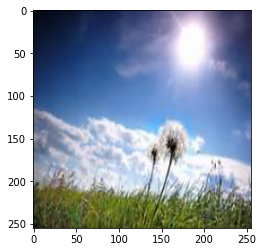

In [62]:
img, label = testing_dataset[125]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_resnet))

Label: shine , Predicted: shine


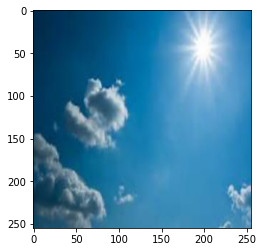

In [63]:
img, label = testing_dataset[160]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_resnet))

Label: rainy , Predicted: rainy


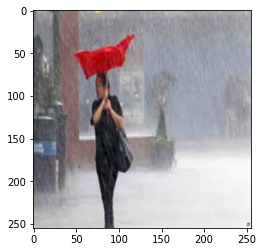

In [64]:
img, label = testing_dataset[76]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label], ', Predicted:', predict_image(img, model_resnet))

In [65]:
test_loader = DeviceDataLoader(DataLoader(testing_dataset, batch_size*2), device)
result = evaluate(model_resnet, test_loader)
result

{'val_acc': 0.8046875, 'val_loss': 1.5362578630447388}

In [66]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer): #GETS CURRENT LEARNING RATE (IT CAN CHANGE NOW AS DISCUSSED ABOVE)
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step() #MODIFIES THE LEARNING RATE
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [95]:
evaluate(model_resnet, val_dl)

{'val_acc': 0.23227164149284363, 'val_loss': 1.6082937717437744}

In [96]:
epochs = 20
max_lr = 0.01
grad_clip = 0.1 #NOW GRADIENT VALUES WILL BE ONLY BE -0.1 TO +0.1!!!!
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [97]:
history5 = fit_one_cycle(epochs, max_lr, model_resnet, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 7.9362, val_loss: 12.0779, val_acc: 0.4757
Epoch [1], train_loss: 13.4463, val_loss: 146.3422, val_acc: 0.3510
Epoch [2], train_loss: 29.9673, val_loss: 7.7601, val_acc: 0.6920
Epoch [3], train_loss: 19.5240, val_loss: 1.6051, val_acc: 0.5904
Epoch [4], train_loss: 6.8587, val_loss: 3.1727, val_acc: 0.6460
Epoch [5], train_loss: 8.0498, val_loss: 1.4589, val_acc: 0.6073
Epoch [6], train_loss: 1.6109, val_loss: 0.8582, val_acc: 0.6833
Epoch [7], train_loss: 1.5495, val_loss: 0.8955, val_acc: 0.6743
Epoch [8], train_loss: 1.5428, val_loss: 1.2899, val_acc: 0.6821
Epoch [9], train_loss: 1.1187, val_loss: 0.6965, val_acc: 0.7163
Epoch [10], train_loss: 1.1409, val_loss: 1.3049, val_acc: 0.6502
Epoch [11], train_loss: 1.0760, val_loss: 0.7692, val_acc: 0.7212
Epoch [12], train_loss: 0.6303, val_loss: 0.6573, val_acc: 0.7512
Epoch [13], train_loss: 0.9752, val_loss: 1.0269, val_acc: 0.7290
Epoch [14], train_loss: 0.6947, val_loss: 0.8654, val_acc: 0.7269
Epoch [15], tr

In [98]:
epochs = 5
max_lr = 0.005 #new learning rate
grad_clip = 0.1 #NOW GRADIENT VALUES WILL BE ONLY BE -0.1 TO +0.1!!!!
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [99]:
history5 += fit_one_cycle(epochs, max_lr, model_resnet, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 1.0582, val_loss: 2.7930, val_acc: 0.7224
Epoch [1], train_loss: 12.9645, val_loss: 1.6133, val_acc: 0.5679
Epoch [2], train_loss: 3.3580, val_loss: 0.7934, val_acc: 0.7251
Epoch [3], train_loss: 1.4197, val_loss: 0.8684, val_acc: 0.7524
Epoch [4], train_loss: 1.3926, val_loss: 0.8335, val_acc: 0.7437


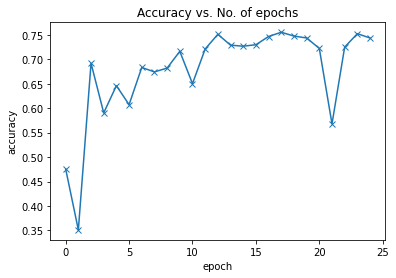

In [100]:
plot_accuracies(history5)

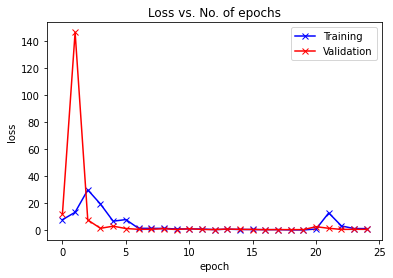

In [101]:
plot_losses(history5)

In [105]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

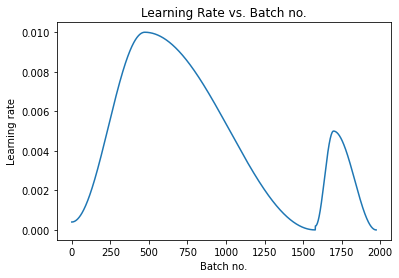

In [106]:
plot_lrs(history5)

In [110]:
test_loader = DeviceDataLoader(DataLoader(testing_dataset, batch_size*2), device)
result = evaluate(model_resnet, test_loader)
result

{'val_acc': 0.859375, 'val_loss': 0.37874966859817505}

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/modelweatherusingresnet9.pth" 
torch.save(model_resnet.state_dict(), path) 
#MODEL WILL BE SAVED AS "modelweatherusingresnet9.pth" file in your google drive!

Resnet 34

In [111]:
import torchvision.models as models

In [160]:
class Resnet34CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()

        # Use a pretrained RESNET34 model.(WHICH WAS TRAINED ON IMAGENET DATASET) 
        #THIS IS TRANSFER LEARNING!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        self.network = models.resnet34(pretrained=True)
        
        # Replace last layer. USING OUR OWN FEED FORWARD LAYERS ACCORDING TO OUR DATASET. WE WILL TRAIN THESE WEIGHTS ON OUR OWN!
        num_ftrs = self.network.fc.in_features
        #same no of input features as in forward layer of resnet34 that we are replacing with our own layer
        self.network.fc = nn.Linear(num_ftrs, 5) #same no of input features and our own no of output features (5)

         
    def forward(self, xb):
        xb= self.network(xb)
        #xb = xb.view(xb.size(0), 256*7*7) #FLATTENING THE ARRAY (total 12544 data points) AND THEN GIVING TO FORWARD NETWORK!!!!
        #NOTE: RESNET CAN TAKE INPUTS OF ANY SIZE. DUE TO CONCEPT OF ADAPTIVE AVERAGE POOLING AS SHOWN IN SRUCTURE ABOVE. THAT'S WHY WE DIRECTLY PASSING THE OUTPUT TO FEED FORWARD NW            
        return xb
    
        
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False #FREEZE THE LAYERS FOR SOME TIME (BECAUSE THEY ARE ALREADY GOOD AT THEIR WORK AS THEY ARE TRAINED ALREADY ON IMAGENET) AND LET'S TRAIN ONLY THE FINAL LAYER WE CREATED!
        for param in self.network.fc.parameters():
            param.require_grad = True #WE WANT TO CHANGE PARAMTERS ONLY OF FINAL LAYER WE CREATED!! (FOR SOME TIME INITIALLY)
    
    def unfreeze(self):
        # Unfreeze all layers (THAT WE FREEZED ABOVE)
        for param in self.network.parameters():
            param.require_grad = True

In [176]:
model_resnet34 = to_device(Resnet34CnnModel(), device)
model_resnet34

Resnet34CnnModel(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [177]:
evaluate(model_resnet34, val_dl)

{'val_acc': 0.11808894574642181, 'val_loss': 1.753415584564209}

In [178]:
model_resnet34.freeze() #FREEZE ALL EXCEPT THE FC LAYER

In [179]:
epochs = 8 #TRY TRAINING FOR MORE EPOCHS AND SEE IF ACCURACY IMPROVES!
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [180]:
history6 = fit_one_cycle(epochs, max_lr, model_resnet34, train_dl, val_dl, 
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)

Epoch [0], train_loss: 0.8397, val_loss: 21.7328, val_acc: 0.3014
Epoch [1], train_loss: 1.0770, val_loss: 1.9056, val_acc: 0.5210
Epoch [2], train_loss: 0.8946, val_loss: 5.2195, val_acc: 0.3254
Epoch [3], train_loss: 0.7953, val_loss: 1.7302, val_acc: 0.5361
Epoch [4], train_loss: 0.6400, val_loss: 0.4296, val_acc: 0.8519
Epoch [5], train_loss: 0.4810, val_loss: 0.2931, val_acc: 0.8966
Epoch [6], train_loss: 0.4354, val_loss: 0.2794, val_acc: 0.9005
Epoch [7], train_loss: 0.3815, val_loss: 0.2312, val_acc: 0.9075


In [181]:
model_resnet34.unfreeze()

In [182]:
epochs=8
history6 += fit_one_cycle(epochs, 0.001, model_resnet34, train_dl, val_dl,  #lr=.05
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)


Epoch [0], train_loss: 0.3566, val_loss: 0.2863, val_acc: 0.9014
Epoch [1], train_loss: 0.4035, val_loss: 0.2753, val_acc: 0.9044
Epoch [2], train_loss: 0.3795, val_loss: 0.2403, val_acc: 0.8936
Epoch [3], train_loss: 0.3960, val_loss: 0.3970, val_acc: 0.8723
Epoch [4], train_loss: 0.3533, val_loss: 0.2700, val_acc: 0.9132
Epoch [5], train_loss: 0.2970, val_loss: 0.1962, val_acc: 0.9297
Epoch [6], train_loss: 0.2510, val_loss: 0.1779, val_acc: 0.9288
Epoch [7], train_loss: 0.2311, val_loss: 0.1968, val_acc: 0.9084


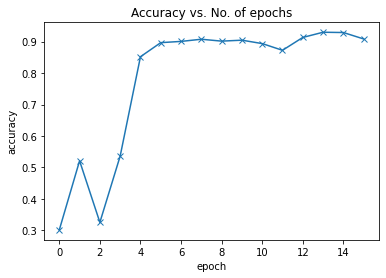

In [183]:
plot_accuracies(history6)

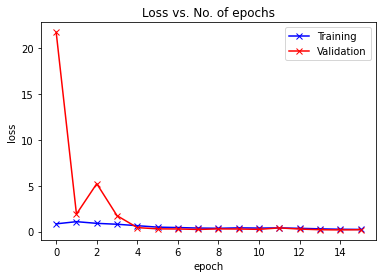

In [184]:
plot_losses(history6)

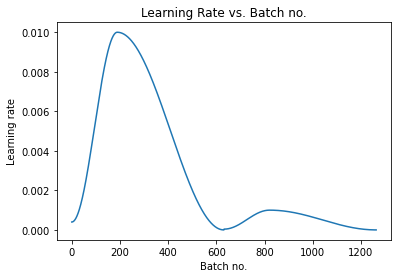

In [185]:
plot_lrs(history6)

In [186]:
test_loader = DeviceDataLoader(DataLoader(testing_dataset, batch_size*2), device)
result = evaluate(model_resnet34, test_loader)
result

{'val_acc': 0.96875, 'val_loss': 0.11575672030448914}

In [192]:
path = "/content/drive/My Drive/Colab Notebooks/modelweatherusingresnet34.pth" 
torch.save(model_resnet34.state_dict(), path) 
#MODEL WILL BE SAVED AS "modelweatherusingresnet34.pth" file in your google drive!